In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# sklearn.datasets.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None,
#                                   tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=50)

In [3]:
from sklearn.model_selection import train_test_split
#sklearn.model_selection.train_test_split(*arrays, test_size=None, 
#       train_size=None, random_state=None, shuffle=True, stratify=None)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

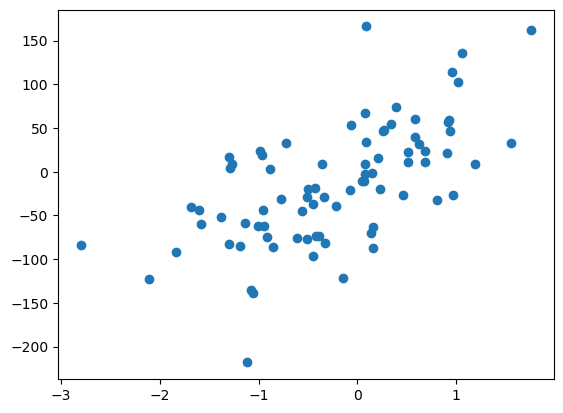

In [4]:
plt.scatter(X_train, y_train)

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
class My_GDReg:
    def __init__(self, coef_, intercept_, epochs, lr):
        self.m = coef_
        self.b = intercept_
        self.n = epochs
        self.lr = lr
        
    def fit(self, X_train, y_train):
        for i in range(self.n):
            # .ravel() flattens a multi-dimensional array to a 1D array, allowing for easier element-wise operations
            loss_slope_b = -2 * np.sum(y_train.ravel() - self.m*X_train.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y_train.ravel() - self.m*X_train.ravel() - self.b)* X_train.ravel())

            self.b = self.b - self.lr*loss_slope_b
            self.m = self.m - self.lr*loss_slope_m
            print(self.m, self.b)
    def predict(self, X_test):
        y_pred = self.m * X_test + self.b
        return y_pred

In [7]:
reg = My_GDReg(coef_=50, intercept_=0, epochs=50, lr=0.01)

In [8]:
reg.fit(X_train, y_train)

48.48428040897729 -4.090423735198851
47.49408580364699 -2.201246556583267
48.547742336422495 -3.7039083871100416
47.61579302046112 -2.4094964555259635
48.42716496943585 -3.5335846484149394
47.721832472494604 -2.5566432775345103
48.334895247417386 -3.4057638722389765
47.80203913499257 -2.667734918249132
48.26518135742697 -3.309206955087278
47.8626323661704 -2.751659179379134
48.21251557806826 -3.2362625702613976
47.908407843405584 -2.8150601965231123
48.17272894006351 -3.1811563547245627
47.942989166377146 -2.862956825455266
48.142671916943634 -3.1395260768909603
47.96911380711356 -2.8991405835014654
48.119965182118825 -3.1080762664529997
47.98884980316443 -2.9264757921694224
48.10281126090888 -3.0843173431871587
48.003759464279 -2.947126318075734
48.0898522416951 -3.066368540733625
48.01502304550279 -2.962726865537702
48.08006228306536 -3.052809024340084
48.02353217666346 -2.9745123804547204
48.072666407776424 -3.042565416985069
48.029960444163 -2.98341580914515
48.06707915522938 -3.03

In [9]:
y_pred = reg.predict(X_test)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

55.18146526949416
4641.555822087492
-1.0794562161174674


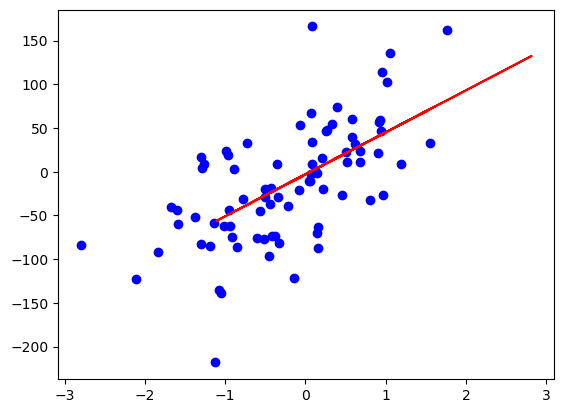

In [11]:
plt.scatter(X_train, y_train, color = 'blue',)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

Checking the values whether it matches with Linear Regression .... 
Using sci-kit inbuilt module to predict it ->

In [12]:
from sklearn.linear_model import LinearRegression
reg_LR = LinearRegression()
reg_LR.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(reg_LR.predict(X_test), y_test))
print(mean_squared_error(reg_LR.predict(X_test), y_test))
print(r2_score(reg_LR.predict(X_test), y_test))

55.18174531080716
4641.583526971487
-1.079409234978249


In [14]:
reg_LR.coef_

array([48.04981884])

In [15]:
reg_LR.intercept_

-3.0109205526584493

In [16]:
from sklearn.linear_model import SGDRegressor
# class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True,
#                                         max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, 
#                                         learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, 
#                                         validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)

In [41]:
grad = SGDRegressor(max_iter=10000, eta0=0.001)

In [42]:
grad.fit(X_train, y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [45]:
y_pred_2 = grad.predict(X_test)

In [46]:
grad.score(X_test, y_test)

0.13118436399721511

In [54]:
r2_score(y_pred_2, y_test)

-1.1197476875508543

In [48]:
# class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True,
#                                  max_iter=1000, tol=0.0001, warm_start=False, positive=False, 
#                                  random_state=None, selection='cyclic')[source]
from sklearn.linear_model import Lasso

In [93]:
lasso_reg = Lasso(max_iter = 1000, alpha=10, selection='cyclic')

In [94]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10)

In [95]:
y_pred_3 = lasso_reg.predict(X_test)

In [96]:
lasso_reg.score(X_test, y_test)

0.15398981602162887

In [69]:
# class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, 
#                                  solver='auto', positive=False, random_state=None)
from sklearn.linear_model import Ridge

In [60]:
reidge_reg = Ridge()

In [71]:
reidge_reg.fit(X_train, y_train)

Ridge()

In [72]:
reidge_reg.predict(X_test)

array([-13.11077793,  52.13838069, 129.99457117,  51.41986077,
        18.23100761,  -8.94863693,  14.81239181, -44.28201528,
         8.19549208, -30.28735012,  69.62960707,  14.44894341,
        72.86381046, -14.30042339,  -0.34733693, -34.78514719,
       -55.64584689, -37.66105861,   5.28009021,  66.48290925])

In [73]:
reidge_reg.score(X_test, y_test)

0.13263838402151185